In [9]:
import numpy as np
import tempfile
import zipfile

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, SpatialDropout2D 
from tensorflow.keras import utils as np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
temp_dir = tempfile.TemporaryDirectory()
temp_dir

<TemporaryDirectory '/tmp/tmp5zmpzu9r'>

In [3]:
with zipfile.ZipFile('bases/cat_dog_dataset.zip') as zip:
    zip.extractall(temp_dir.name)

In [4]:
model = Sequential()

model.add(InputLayer(shape=(64, 64, 3,)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,985 (3.17 MB)

 Trainable params: 829,857 (3.17 MB)

 Non-trainable params: 128 (512.00 B)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
train_generator = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=7, 
    horizontal_flip=True, 
    shear_range=0.2, 
    zoom_range=0.2
)

In [12]:
test_generator = ImageDataGenerator(rescale=1./255)

In [18]:
base_train = train_generator.flow_from_directory(f'{temp_dir.name}/dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size = 32,
                                                 class_mode='binary')

Found 4000 images belonging to 2 classes.


In [19]:
base_test = test_generator.flow_from_directory(f'{temp_dir.name}/dataset/test_set',
                                                 target_size=(64, 64),
                                                 batch_size = 32,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [22]:
model.fit(base_train, epochs=10, validation_data=base_test)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.5589 - loss: 0.8802

/home/appmarketing/anaconda3/envs/dlp/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 69s 534ms/step - accuracy: 0.5590 - loss: 0.8795 - val_accuracy: 0.5000 - val_loss: 1.2387
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 67s 417ms/step - accuracy: 0.6407 - loss: 0.6543 - val_accuracy: 0.5120 - val_loss: 1.5883
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 495ms/step - accuracy: 0.6425 - loss: 0.6234 - val_accuracy: 0.6080 - val_loss: 0.7670
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 472ms/step - accuracy: 0.6601 - loss: 0.6229 - val_accuracy: 0.6580 - val_loss: 0.6157
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 90s 501ms/step - accuracy: 0.6796 - loss: 0.5886 - val_accuracy: 0.6830 - val_loss: 0.5972
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 469ms/step - accuracy: 0.7003 - loss: 0.5749 - val_accuracy: 0.6900 - val_loss: 0.5877
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 67s 499ms/step - accuracy: 0.7021 - loss: 0.5701 - val_accuracy: 0.6540 - val_loss: 0.6187
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 424ms/step - accuracy: 0.7133 - loss: 0.5323 - val

### Nova Classificação

In [51]:
example_image = image.load_img(f'{temp_dir.name}/dataset/test_set/cachorro/dog.3513.jpg', target_size=(64, 64))

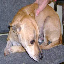

In [48]:
example_image

In [49]:
type(example_image)

PIL.Image.Image

In [52]:
example_image = image.img_to_array(example_image)
example_image

array([[[ 97., 103., 117.],
        [ 78.,  84.,  98.],
        [ 94., 100., 114.],
        ...,
        [ 11.,  16.,  19.],
        [ 19.,  20.,  24.],
        [ 19.,  17.,  22.]],

       [[ 94., 100., 114.],
        [ 89.,  95., 109.],
        [ 94., 100., 114.],
        ...,
        [ 43.,  48.,  51.],
        [ 46.,  47.,  51.],
        [ 45.,  44.,  49.]],

       [[ 93.,  99., 113.],
        [ 88.,  94., 108.],
        [108., 114., 128.],
        ...,
        [ 31.,  36.,  30.],
        [ 43.,  44.,  39.],
        [ 49.,  48.,  44.]],

       ...,

       [[120., 125., 144.],
        [104., 109., 128.],
        [111., 116., 135.],
        ...,
        [ 96.,  98., 121.],
        [ 94.,  92., 106.],
        [ 96.,  89.,  96.]],

       [[124., 129., 148.],
        [111., 116., 135.],
        [113., 118., 137.],
        ...,
        [ 72.,  71.,  77.],
        [ 23.,  19.,  16.],
        [ 27.,  21.,   9.]],

       [[114., 119., 138.],
        [106., 111., 130.],
        [111., 1

In [53]:
example_image /= 255

In [54]:
example_image.shape

(64, 64, 3)

In [55]:
example_image = np.expand_dims(example_image, axis=0)

In [56]:
example_image.shape

(1, 64, 64, 3)

In [57]:
prev = model.predict(example_image)
prev

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.36191976]], dtype=float32)

In [58]:
prev = prev > 0.5

In [61]:
prev

array([[False]])

In [60]:
base_train.class_indices

{'cachorro': 0, 'gato': 1}